In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing  import MinMaxScaler
from scipy.stats import norm
import math
import seaborn as sns

breast_cancer_df = pd.read_pickle('wdbc.pkl')
breast_cancer_df.head()

,id,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Classifier

Normalisation and splitting into malignant and benign

In [ ]:
breast_cancer_df_norm = pd.read_pickle('wdbc.pkl')
exclude_column = ['id','malignant']
columns_to_normalize = [col for col in breast_cancer_df_norm.columns if col not in exclude_column]
scaler = MinMaxScaler()
breast_cancer_df_norm[columns_to_normalize] = scaler.fit_transform(breast_cancer_df_norm[columns_to_normalize])

#divide df into malignant and belign df
condition = breast_cancer_df["malignant"]==1
malignant = breast_cancer_df[condition]
benign = breast_cancer_df[~condition]

condition = breast_cancer_df_norm["malignant"]==1
malignant = breast_cancer_df_norm[condition] #should be malignant_norm
benign = breast_cancer_df_norm[~condition] #should be benign_norm


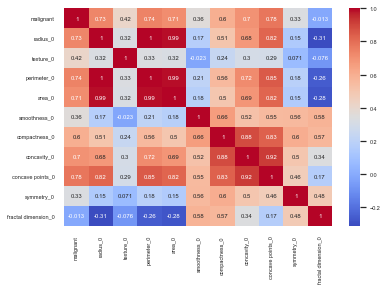

In [ ]:
corrdata = breast_cancer_df_norm[['malignant','radius_0','texture_0','perimeter_0','area_0','smoothness_0','compactness_0','concavity_0','concave points_0','symmetry_0','fractal dimension_0']]
corr_matrix = corrdata.corr()

sns.set(font_scale=0.5)
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

plt.savefig('correlation_map.png', dpi=500)

Finding threshold for perimeter

0.27765876580747706


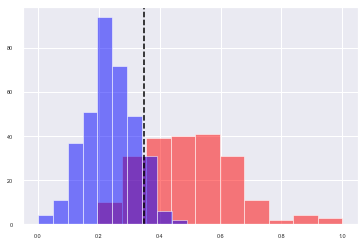

In [ ]:
malignant['perimeter_0'].hist(color = 'red', alpha = 0.5)
benign['perimeter_0'].hist(color = 'blue', alpha = 0.5)
malignant_sorted = malignant.sort_values(by='perimeter_0', ascending=False)

# calculate index at which 5% of malignant cells would be missed
num_malignant_cells = len(malignant_sorted)
num_missed_malignant_cells = int(np.ceil(0.05 * num_malignant_cells))
threshold_index = num_malignant_cells - num_missed_malignant_cells

# set threshold based on radius value at index
threshold = malignant_sorted.iloc[threshold_index]['perimeter_0']
print(threshold)

# add threshold line to plot
plt.axvline(0.35, color='black', linestyle='dashed')
plt.savefig('perimeter_dist_t.png', dpi=500)

plt.show()

Finding threshold for concavity

0.12382849109653232


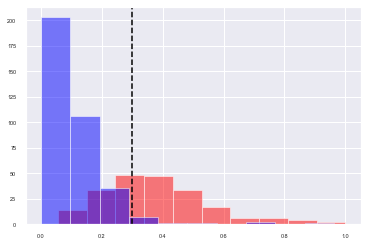

In [ ]:

malignant['concavity_0'].hist(color = 'red', alpha = 0.5)
benign['concavity_0'].hist(color = 'blue', alpha = 0.5)

malignant_sorted = malignant.sort_values(by='concavity_0', ascending=False)

# calculate index at which 5% of malignant cells would be missed
num_malignant_cells = len(malignant_sorted)
num_missed_malignant_cells = int(np.ceil(0.05 * num_malignant_cells))
threshold_index = num_malignant_cells - num_missed_malignant_cells

# set threshold based on radius value at index
threshold = malignant_sorted.iloc[threshold_index]['concavity_0']
print(threshold)

# add threshold line to plot
plt.axvline(0.3, color='black', linestyle='dashed')
plt.savefig('concavity_dist.png', dpi=500)

plt.show()

Finding threshold for texture

0.21068650659452137


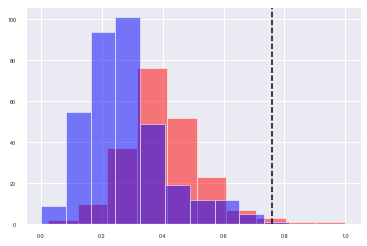

In [ ]:
malignant['texture_0'].hist(color = 'red', alpha = 0.5)
benign['texture_0'].hist(color = 'blue', alpha = 0.5)

malignant_sorted = malignant.sort_values(by='texture_0', ascending=False)

# calculate index at which 5% of malignant cells would be missed
num_malignant_cells = len(malignant_sorted)
num_missed_malignant_cells = int(np.ceil(0.05 * num_malignant_cells))
threshold_index = num_malignant_cells - num_missed_malignant_cells

# set threshold based on radius value at index
threshold = malignant_sorted.iloc[threshold_index]['texture_0']
print(threshold)

# add threshold line to plot
plt.axvline(0.76, color='black', linestyle='dashed')
plt.savefig('texture_dist.png', dpi=500)

plt.show()

Finding threshold for homogeneity

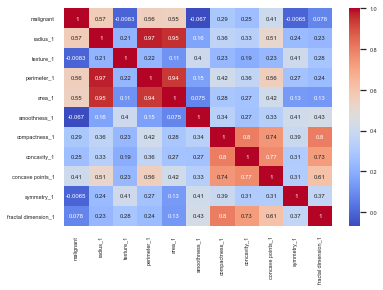

In [ ]:
#find out which standard error correlates to malignant

corrdata = breast_cancer_df_norm[['malignant','radius_1','texture_1','perimeter_1','area_1','smoothness_1','compactness_1','concavity_1','concave points_1','symmetry_1','fractal dimension_1']]
corr_matrix = corrdata.corr()

sns.set(font_scale=0.5)
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')  #----> standard error in radius seems to be highest correlated with malignant. Choose therefore this feature.

plt.savefig('correlation_map_SE.png', dpi=500)


C:\Users\johan\AppData\Local\Temp/ipykernel_13652/4107670301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malignant['radius_1'] = malignant[standard_error].mean(axis=1)
C:\Users\johan\AppData\Local\Temp/ipykernel_13652/4107670301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benign['radius_1'] = benign[standard_error].mean(axis=1)


0.08104551813501867


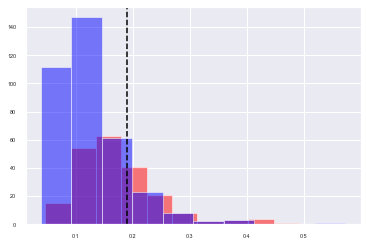

In [ ]:
malignant['radius_1'] = malignant[standard_error].mean(axis=1)
benign['radius_1'] = benign[standard_error].mean(axis=1)

malignant['radius_1'].hist(color = 'red', alpha = 0.5)
benign['radius_1'].hist(color = 'blue', alpha = 0.5)

malignant_sorted = malignant.sort_values(by='radius_1', ascending=False)

# calculate index at which 5% of malignant cells would be missed
num_malignant_cells = len(malignant_sorted)
num_missed_malignant_cells = int(np.ceil(0.05 * num_malignant_cells))
threshold_index = num_malignant_cells - num_missed_malignant_cells

# set threshold based on radius value at index
threshold = malignant_sorted.iloc[threshold_index]['radius_1']
print(threshold)

# add threshold line to plot
plt.axvline(0.19, color='black', linestyle='dashed')

plt.savefig('radius_SE_dist.png', dpi=500)

plt.show()